# Ejercicio 2

In [1]:
import matplotlib.pyplot as plt

In [2]:
import scipy.io as sio

In [29]:
import numpy as np

In [31]:
import cv2

In [4]:
# Read the MATLAB generated file
lenna_mat = sio.loadmat('../resources/lenna.mat')

# Extract the image content
img_original = np.double(lenna_mat['lenna']) / 255

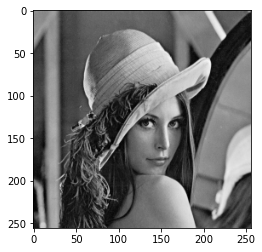

In [5]:
plt.imshow(img_original, cmap='gray')

## Funciones

In [6]:
def get_ideal_lowpass(order, size):
    """ Creates an ideal lowpass 2D filter with the size of the image.
        @param order Order of the kernel or mask
        @param size Size of the image (width, height)
        @return Image sized kernel
    """
    # Extract the width and height from the size parameters
    N, M = size
    
    # Create the kernel
    kernel = np.zeros((N, M))
    n = np.int(order/2)
    m = np.int(M / 2)
    kernel[m-n:m+n+1,m-n:m+n+1] = np.ones((order, order)) / (order**2)
    
    # Return the kernel
    return kernel

In [11]:
def generate_noise(image, snr):
    """ Generates a 2D noise image with a SNR taken relative to the
        provided image.
        @param image Reference image for the power estimation and size settings
        @param snr Signal to Noise Ratio
        @return Noise image
    """
    # Estimate the image standard deviation
    image_std = image.std()
    # Compute the statistical parameters of the noise
    noise_std = np.sqrt(((image_std)**2) * (10**(-snr/10)))
    noise_mean = 0
    # Create the noise image
    return np.random.normal(noise_mean, noise_std, image.shape)

In [12]:
def apply_filter(kernel, image):
    """ Apply a 2D filtering to an image in the frequency domain using a kernel.
        with the same size of the image.
        @param kernel Filter kernel or mask
        @param image Image to filter
        @return Resulting image
    """
    image_spectrum = np.fft.fftshift(np.fft.fft2(image))
    kernel_spectrum = np.fft.fftshift(np.fft.fft2(kernel))
    return np.abs(np.fft.fftshift(np.fft.ifft2(image_spectrum * kernel_spectrum)))

In [20]:
def apply_wiener_filter(original_img, degraded_img, noise, kernel):
    H = np.fft.fft2(kernel)
    G = np.fft.fft2(degraded_img)
    Snn = np.square(np.abs(np.fft.fft2(noise)))
    Sff = np.square(np.abs(np.fft.fft2(original_img)))
    W = np.conj(H)/(np.square(np.abs(H)) + Snn/Sff)
    F_hat = np.fft.fftshift(W*G)
    f = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(F_hat))))
    return f

In [37]:
def calculate_mse(original, restaured):
    """ Calculates the MSE with the original and the restaured image.
        @param original Original image
        @param restaured Restaured image
        @return Estimation of the MSE
    """
    return (original - restaured).var()

## Se genera la imagen con blur+noise

In [38]:
# Calculate an ideal low pass filter
kernel = get_ideal_lowpass(5, img_original.shape)

# Apply a blurr effect to the image
img_blurred = apply_filter(kernel, img_original)

# Calculate a noise image with the configured SNR
snr = 30
noise = generate_noise(img_blurred, snr)

# Create the new degraded image
img_blurred_noise = img_blurred + noise

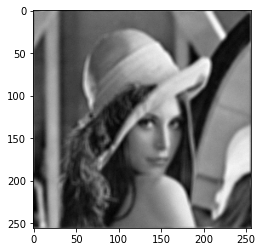

In [39]:
# Plot the iamge
plt.imshow(img_blurred_noise, cmap='gray')

In [42]:
restored_wienier = apply_wiener_filter(img_original, img_blurred_noise, noise, kernel)

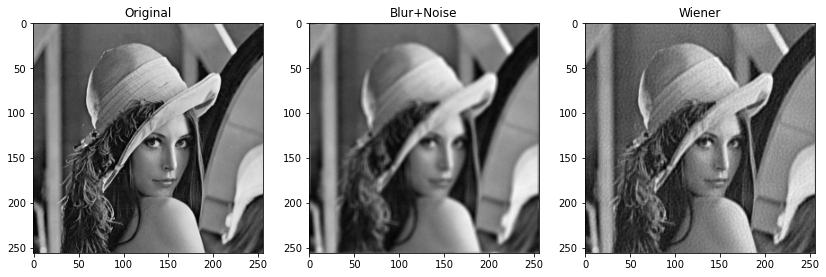

In [44]:
fig=plt.figure(figsize=(14, 10))
fig.add_subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img_original,cmap='gray')
fig.add_subplot(1, 3, 2)
plt.title('Blur+Noise')
plt.imshow(img_blurred_noise,cmap='gray')
fig.add_subplot(1, 3, 3)
plt.title('Wiener')
plt.imshow(restored_wienier,cmap='gray')